## Observations and Insights

## Dependencies and starter code

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [42]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [43]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [44]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, 
                                   how="left", on=["Mouse ID", 
                                                   "Mouse ID"])
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

In [46]:
# Get the summary values for the tumor volume to input into a data frame
# Mean Value
mean_tv = complete_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_tv

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [47]:
# Median value
median_tv = complete_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_tv

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Variance value
var_tv = complete_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_tv

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [49]:
# Standard Deviation value
std_tv = complete_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_tv

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [50]:
# SEM Value
# Generate a new 30 vehicle sample and calculate the SEM of the sample
# Standard Deviation value
sem_tv = complete_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_tv

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [51]:
# Combine values into a data frame
summary_stats = pd.DataFrame({"Mean": mean_tv,
                             "Median": median_tv,
                             "Variance": var_tv,
                             "Standard Deviation": std_tv,
                             "Standard Error": sem_tv})
summary_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

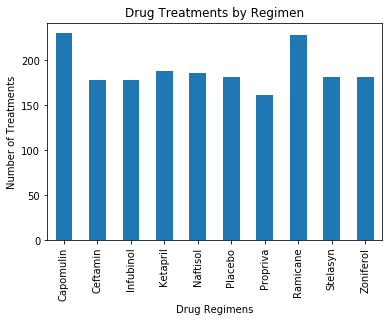

<Figure size 432x288 with 0 Axes>

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create a group based on drug regimen values
drug_regimens = complete_df.groupby('Drug Regimen')
# Count how many times each maker appears in our group
count_reg = drug_regimens['Drug Regimen'].count()
# Create a bar chart based off of these values
dr_barchart = count_reg.plot(kind='bar', title="Drug Treatments by Regimen")
dr_barchart.set_xlabel("Drug Regimens")
dr_barchart.set_ylabel("Number of Treatments")

plt.show()
plt.tight_layout()


In [53]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create a group based on drug regimen values
drug_regimens = np.arange(int("Drug Regimen")
# Count how many times each maker appears in our group
count_reg = drug_regimens['Drug Regimen'].count()

plt.bar(drug_regimens, count_reg, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Drug Treatments for Each Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Treatments")

SyntaxError: invalid syntax (<ipython-input-53-9918a71c61f9>, line 6)

## Pie plots

In [ ]:
# Generate pie plots showing the distribution of female versus male mice

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Split up data into groups based on sex
gender_groups = complete_df.groupby('Sex')
# Find out how many tests were completed on each of the sexes
gender_tests = gender_groups['Drug Regimen'].count()
genders_plot = gender_tests.plot(kind="pie", subplots=True, figsize=(5,5))

#plt.tight_layout()
# plt.axis("equal")
# plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male Mice", "Female Mice"]
colors = ['blue', 'orange']
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_tests, labels=labels, colors=colors,
        autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [126]:
# Calculate the final tumor volume of each mouse across 
# four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are 
# any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = complete_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.29220039
The interquartile range of tumor volume is: 11.292200389999998
The the median tumor volume is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


In [110]:
# # Retrieve data for the following drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Resource = http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

## combine these different collections into a list    
drugCa_df = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin") & (complete_df["Timepoint"]==45),:]
drugR_df = complete_df.loc[(complete_df["Drug Regimen"] == "Ramicane") & (complete_df["Timepoint"]==45),:]
drugI_df = complete_df.loc[(complete_df["Drug Regimen"] == "Infubinol") & (complete_df["Timepoint"]==45),:]
drugCe_df = complete_df.loc[(complete_df["Drug Regimen"] == "Ceftamin") & (complete_df["Timepoint"]==45),:]


In [111]:
# Convert these data frames into a list
tvs_Ca = drugCa_df["Tumor Volume (mm3)"].values.tolist()
tvs_R = drugR_df["Tumor Volume (mm3)"].values.tolist()
tvs_I = drugI_df["Tumor Volume (mm3)"].values.tolist()
tvs_Ce = drugCe_df["Tumor Volume (mm3)"].values.tolist()
# Combine all these lists into one list for the scatter plot
data_to_plot = [tvs_Ca, tvs_R, tvs_I, tvs_Ce]

<Figure size 1440x432 with 0 Axes>

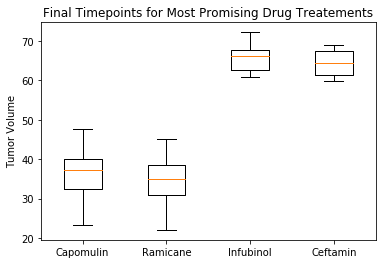

<Figure size 432x288 with 0 Axes>

In [112]:
# Generate a box plot of the final tumor volume of 
# each mouse across four regimens of interest

fig1 = plt.figure(1, figsize=(20, 6))
fig1, ax1 = plt.subplots()
ax1.set_title('Final Timepoints for Most Promising Drug Treatements')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data_to_plot)
plt.show()
plt.savefig("../box_whisker.png")

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus 
# tumor volume for a mouse treated with Capomulin
mouse_tv = 

mouse.plot(label="Capomulin Mouse")
combined_df.loc['Capomulin', "0":"45"].plot(label="Capomulin")
plt.legend()
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus 
# average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and 
# linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen